In [2]:

import pandas as pd
import numpy as np
from utils import *

# Replace 'your_file.csv' with the path to your actual CSV file
file_path = '../data/fraud/real_world_creditcard.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

len(df)

284807

In [3]:
df = df[["Amount"]]
df.head()

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99


In [4]:
df["Amount"].mean()
dataset = df["Amount"].tolist()


In [5]:
loop_run_times = {}
clients_run_times = {}
ref_data = dataset[:100000]
dataset = dataset[100000:]
for i in range(50):
    new_data = np.random.choice(df['Amount'], size=100000).tolist()
    for j in range(len(new_data)):
        new_data[j] = max(new_data[j] + 10*(np.random.normal(0, 1)), 0)
    dataset = dataset + new_data

    client_time, loop_time = get_digest_ks_run_times(ref_data, dataset)

    print(f'client time:{client_time}')
    print(f'loop time:{loop_time}')

    loop_run_times[len(dataset)] = loop_time
    clients_run_times[len(dataset)] = client_time



reference_digest.batch_update(ref_data) took:1.9110090732574463 seconds to run.
test_digest.batch_update(ref_data) took:4.825275897979736 seconds to run.
checking the loop took:92.6073203086853 seconds to run.
client time:4.825275897979736
loop time:92.6073203086853
reference_digest.batch_update(ref_data) took:1.7626903057098389 seconds to run.
test_digest.batch_update(ref_data) took:7.10224986076355 seconds to run.
checking the loop took:98.87235069274902 seconds to run.
client time:7.10224986076355
loop time:98.87235069274902
reference_digest.batch_update(ref_data) took:1.7690844535827637 seconds to run.
test_digest.batch_update(ref_data) took:9.163769960403442 seconds to run.
checking the loop took:98.29071998596191 seconds to run.
client time:9.163769960403442
loop time:98.29071998596191
reference_digest.batch_update(ref_data) took:1.7535369396209717 seconds to run.
test_digest.batch_update(ref_data) took:10.798603296279907 seconds to run.
checking the loop took:116.64420700073242 

{284807: 92.6073203086853, 384807: 98.87235069274902, 484807: 98.29071998596191, 584807: 116.64420700073242, 684807: 95.52596068382263, 784807: 96.97732782363892, 884807: 96.24888396263123, 984807: 102.76170492172241, 1084807: 105.36451530456543, 1184807: 108.31074452400208, 1284807: 97.64078617095947, 1384807: 99.14054203033447, 1484807: 96.1982536315918, 1584807: 102.35810375213623, 1684807: 97.64643049240112, 1784807: 106.2927348613739, 1884807: 104.6124496459961, 1984807: 102.22996163368225, 2084807: 101.04029202461243, 2184807: 98.9521131515503, 2284807: 101.24403500556946, 2384807: 100.47813177108765, 2484807: 99.53884387016296, 2584807: 97.21506023406982, 2684807: 100.29543209075928, 2784807: 98.20556282997131, 2884807: 98.49017834663391, 2984807: 101.10538244247437, 3084807: 96.43840193748474, 3184807: 102.19301271438599, 3284807: 100.66008162498474, 3384807: 107.06721663475037, 3484807: 105.89825177192688, 3584807: 97.81860518455505, 3684807: 96.30782675743103, 3784807: 96.098

FileNotFoundError: [Errno 2] No such file or directory: 'figures/run_time_results.pdf'

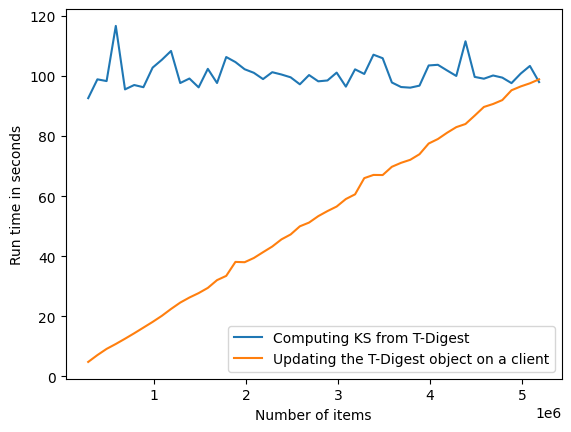

In [7]:
print(loop_run_times)
print(clients_run_times)
plot_run_times(loop_run_times, clients_run_times, "run_time_results")

In [8]:
def plot_run_times2(loop_times: dict, client_times: dict, figure_name="figure"):
    k = len(loop_times.values())

    # Plot ground truth
    plt.plot(loop_times.keys(), loop_times.values(), label='Computing KS from T-Digest')
    plt.plot(loop_times.keys(), client_times.values(), label='Updating the T-Digest object on a client')

    # Add labels, title, and legend
    plt.xlabel('Number of items')
    plt.ylabel('Run time in seconds')
    plt.legend()

    # Show the plot
    plt.savefig(f'../figures/{figure_name}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()



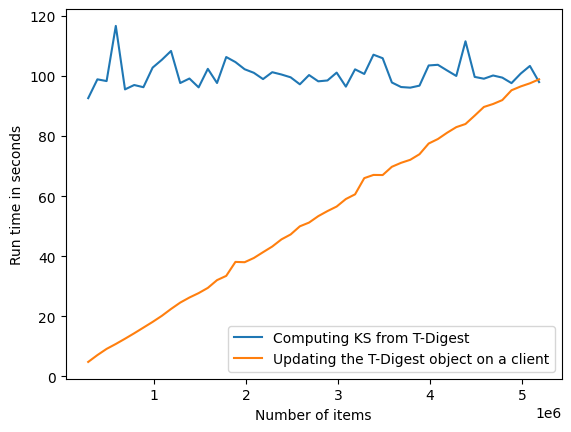

In [9]:
plot_run_times2(loop_run_times, clients_run_times, "run_time_results")


In [10]:
with open('dicts_saved.txt', 'w') as file:
    # Writing the dictionaries as strings to the file
    file.write(str(loop_run_times))
    file.write('\n')
    file.write(str(clients_run_times))